# Les arbres binaires de recherches (ABR)

Un arbre binaire de recherche (ABR) est une structure de donnée composée de noeuds.

Chaque noeud a au plus 2 enfants ordonnés d’une manière particulière :

* les enfants à gauche d’un noeud ont des valeurs inférieures à lui.
* les enfants à droite d’un noeud ont des valeurs supérieures à lui.

Et cela doit être vrai pour chaque nœud de l’arbre.


Nous utiliserons une implémentation par classe pour représenter un arbre:

In [ ]:
class Noeud:
    def __init__(self, valeur, gauche = None, droit = None):
        self.valeur = valeur
        self.gauche = gauche
        self.droit = droit
        self.parent=None
        
    def __str__(self):
        return str(self.valeur)

    def estFeuille(self):
        if not self.gauche and not self.droit:
            return True
        else:
            return False
        
    def racine(self):
        return self.valeur
    

####################################################################################################################
#                             Partie pour l'affichage de l'arbre                                                   #
####################################################################################################################

def hauteur(arbre):
    if arbre is None:
        return 0
    else:
        return 1 + max(hauteur(arbre.gauche), hauteur(arbre.droit))
    
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(8,8), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if arbre is not None:
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre.valeur)
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre is None:
        return
    
    branches = [[]]
    profondeur = hauteur(arbre)
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre.valeur)}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()

## Comment construire un ABR ?

Par exemple, On souhaite représenter la liste de nombres [6,8,3,1,4,9,2,7,5]

* Dans un premier temps on crée la racine de l’arbre.
* Puis on insère les noeuds en respectant les règles d’un ABR.

Comme le montre ce schéma :

<img src =" 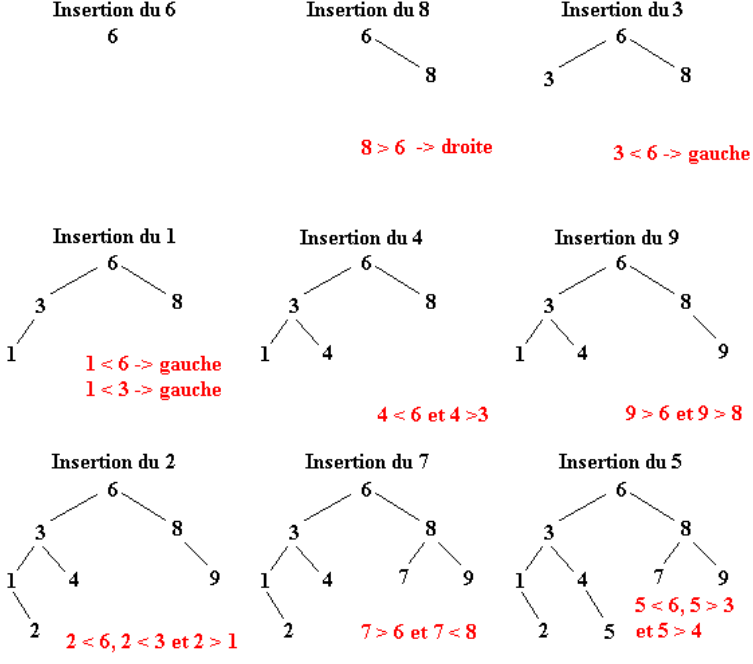" width="500px">


## L'algorithme (récursif) d'insertion dans un ABR


<ul>
    <li> Si la valeur à insérer est strictement inférieure à la racine de l'arbre</li>
    <ul>
        <li> Si la racine n'a pas de fils gauche</li>
        <ul>
            <li> On crée le fils gauche avec la valeur</li>
            <li> On précise que le parent de la valeur est la racine</li>
        </ul>
        <li> Sinon</li>
        <ul>
            <li> On insere la valeur dans l'arbre gauche</li>
        </ul>
    </ul>
    <li> Sinon Si la valeur est strictement supérieure à la racine de l'arbre</li>
    <ul>
        <li> Si la racine n'a pas de fils droit</li>
        <ul>
            <li> On crée le fils droit avec la valeur</li>
            <li> On précise que le parent est la racine</li>
        </ul>
        <li> Sinon</li>
        <ul>
            <li> On insere la valeur dans l'arbre gauche</li>
        </ul>
    </ul>
 </ul>
 
### À faire 1 :
 
***Écrire une fonction ou une méthode qui permet d'insérer une valeur dans un ABR***

In [ ]:
def inserer(arbre,valeur):
    pass

##############################
# pour tester votre fonction #
##############################
'''
abr = Noeud(6)
liste = [6,8,3,1,4,9,2,7,5]
for el in liste:
    inserer(abr,el)  # Si c'est une méthode abr.inserer(el)
repr_graph(abr,(3,3))'''

### À faire 2:

le code ci-dessous génère une liste de 20 entiers .

***Créer et afficher l'abr construit à partir de cette liste en choisissant vous même la racine***

In [ ]:
from random import randint
lst = [ randint(0,50) for i in range(10) ]
print(lst)

In [ ]:
# à faire 2


### À faire 3 :

Récupérer les méthodes des différents parcours en profondeur (préfixe, infixe et suffixe).

***Faites les fonctionner sur notre arbre.***

***Lequel d’entre eux affiche la liste triée?***

### À faire 4:

***Écrire un programme qui utilise une structure d'ABR pour trier une liste d'entiers***

In [ ]:
def tri(arbre):
    pass
    

### À faire 5:

***Écrire un programme qui utilise une structure d'ABR pour trouver le maximum d'une liste d'entiers***

In [3]:
def maximum(arbre):
    if arbre:
        pass

### À faire 6:

***Écrire un programme qui utilise une structure d'ABR pour trouver le minimum d'une liste d'entiers***

In [ ]:
def minimum(arbre):
    if arbre:
        pass

### À faire 7:

On considère l'arbre de recherche suivant construit à partir de la liste

L=['chat','chien','souris','araignée','crapaud','grenouille','lézard','zèbre']

In [ ]:
L2=['chien','chat','souris','araignée','crapaud','grenouille','lézard','zèbre']
abr4=Noeud(L2[5])

'''
for i in range(1,len(L2)):
    inserer(abr4,L2[i])'''

# ou bien 
'''
for i in range(1,len(L2)):
    abr4.inserer(L2[i])'''
        
#repr_graph(abr4,(6,3))

***Écrire une fonction qui renvoie Vrai si une valeur est trouvée dans l'arbre***

Un tel algorithme est de complexité logarithmique.

exemple : recherche(abr4,'tortue') renvoie Faux  et recherche(abr4,'crapaud') renvoie Vrai


In [ ]:
def recherche(arbre,valeur):
    pass
    
print(recherche(abr4,'tortue'))
print(recherche(abr4,'crapaud'))

### À faire 8:

***Écrire une fonction qui utilise une structure d’ABR pour trouver le chemin depuis la racine jusqu’à un noeud donné.***

On pourra la tester sur l'abre précédent :  grenouille --> souris --> lézard

In [ ]:
# chemin entre la racine et une valeur
